In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
X, y = load_breast_cancer(return_X_y=True)

In [5]:
X.shape

(569, 30)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [12]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1, 10]
    }
]

In [13]:
estimator = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=5, verbose=5)

In [14]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.1s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=5)

In [15]:
estimator.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [16]:
estimator.best_score_

0.9789603283173735

In [17]:
y_pred = estimator.best_estimator_.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [19]:
accuracy_score(y_test, y_pred)

0.9790209790209791

In [20]:
confusion_matrix(y_test, y_pred)

array([[50,  3],
       [ 0, 90]])

In [21]:
f1_score(y_test, y_pred)

0.9836065573770492

In [22]:
num_instances = 1000
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

In [23]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [24]:
y = f(X[:,0], X[:, 1])

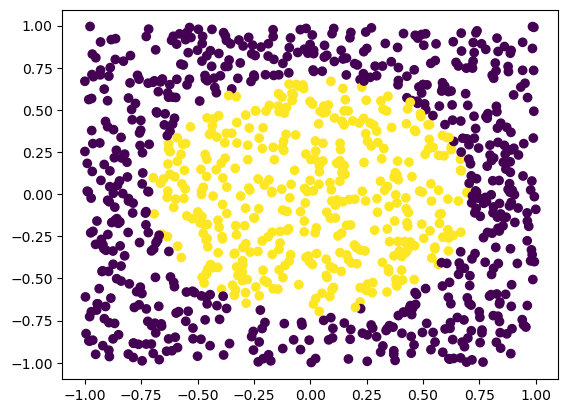

In [25]:
plt.scatter(X[:,0], X[:,1], c=y)

In [26]:
model = SVC(kernel='linear')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=123)

In [28]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_train_pred = model.predict(X_train)

In [30]:
y_test_pred = model.predict(X_test)

In [31]:
accuracy_score(y_train, y_train_pred)

0.614

In [32]:
accuracy_score(y_test, y_test_pred)

0.616

In [33]:
model = SVC(kernel='rbf')

In [34]:
model.fit(X_train, y_train)

SVC()

In [35]:
y_train_pred = model.predict(X_train)

In [36]:
accuracy_score(y_train, y_train_pred)

0.98

In [37]:
y_test_pred = model.predict(X_test)

In [38]:
accuracy_score(y_test, y_test_pred)

0.952

In [39]:
print(f'Broj potpornih vekotra za svaku od klasa: {model.n_support_}')
print(f'Indeksi instanci koje su potporni vektori: {model.support_}')
print(f'Sami potporni vekotri: {model.support_vectors_}')

Broj potpornih vekotra za svaku od klasa: [55 56]
Indeksi instanci koje su potporni vektori: [  4  12  16  27  30  43  49  61  88 119 146 155 162 164 172 179 181 183
 184 206 218 221 223 241 243 245 258 277 278 307 310 314 316 321 338 341
 357 366 371 380 386 393 396 400 403 416 419 428 440 451 464 471 472 484
 491  36  42  59  74  79  85  86  93  98 101 102 103 106 110 123 131 132
 152 165 182 186 187 212 219 226 227 230 232 236 250 271 283 291 297 318
 322 329 334 342 355 382 383 387 388 390 409 421 430 433 436 441 444 448
 465 479 490]
Sami potporni vekotri: [[ 0.46455782 -0.58414316]
 [ 0.59731533  0.41246524]
 [-0.80591343 -0.02635471]
 [ 0.50715722  0.53502385]
 [ 0.61740452 -0.52334394]
 [ 0.74655258 -0.02418202]
 [-0.64702003  0.4109465 ]
 [-0.69427424 -0.32534209]
 [ 0.70311947  0.20754435]
 [ 0.450851    0.55468015]
 [-0.75461891  0.28836587]
 [ 0.2356452   0.71449956]
 [ 0.71575553 -0.0519614 ]
 [-0.72815742 -0.10397815]
 [ 0.01253233  0.73632453]
 [ 0.42860272  0.57167474]


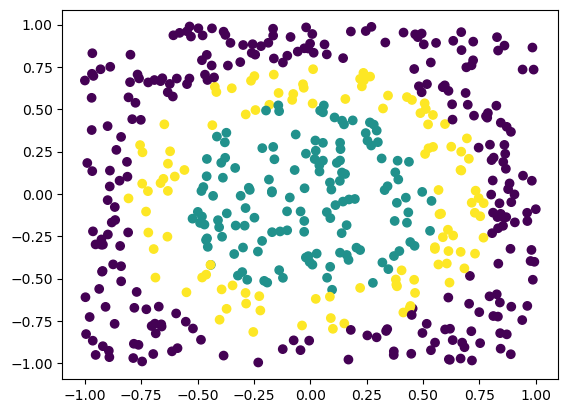

In [40]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()

In [41]:
def plot_3d(x, y, z, c, elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.scatter(x, y, z, c=c)
    plt.show()

In [42]:
def visualize_rbf(X, y, gamma=1):
    z = np.exp(-gamma*(X**2).sum(1))
    plot_3d(X[:,0], X[:,1], z, c=y, elev=0, azim=30)

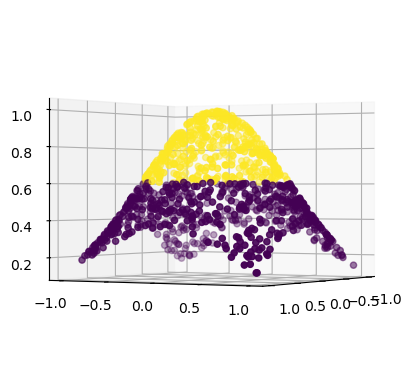

In [43]:
visualize_rbf(X, y)

In [44]:
def visualize_poly(X, y):
    plot_3d(X[:,0]**2, np.sqrt(2)*X[:,0]*X[:,1], X[:,1]**2, c=y, elev=0, azim=60)

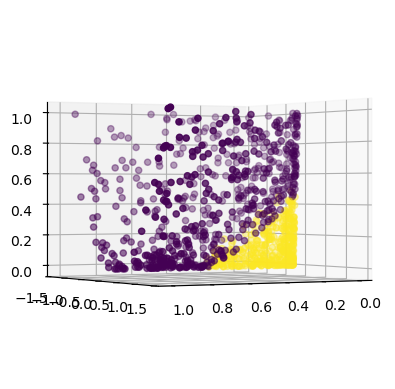

In [45]:
visualize_poly(X, y)